In [2]:
import pandas as pd
import numpy as np
from datascience import *
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

In [3]:
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,Course Code,Course Title,Course Year,Student Number,Department Code,Course Level,Letter Grade,Status,Semester,Theoritical,Practical,Course Credit,ECTS
0,IE 316,Engineering Economics,3,713,IE,Undergraduate,A,Successful,2014 - Spring,2,2,3,5
1,MGT 201,Principles of Management,2,713,ITM,Undergraduate,A,Successful,2013 - Fall,3,0,3,5
2,PHYS 104,Physics II - Electromagnetics and Modern Physics,1,713,IE,Undergraduate,A,Successful,2012 - Spring,3,2,4,6
3,UNI 123,Textual Analysis and Effective Communication,1,713,IE,Undergraduate,A,Successful,2012 - Spring,3,0,3,5
4,ENGR 244,Engineering Materials,2,713,IE,Undergraduate,A-,Successful,2013 - Spring,3,0,3,5


In [4]:
df.drop([df.columns[0], df.columns[1], df.columns[3], df.columns[7]], inplace=True, axis=1)
df.head()

,Course Year,Department Code,Course Level,Letter Grade,Semester,Theoritical,Practical,Course Credit,ECTS
0,3,IE,Undergraduate,A,2014 - Spring,2,2,3,5
1,2,ITM,Undergraduate,A,2013 - Fall,3,0,3,5
2,1,IE,Undergraduate,A,2012 - Spring,3,2,4,6
3,1,IE,Undergraduate,A,2012 - Spring,3,0,3,5
4,2,IE,Undergraduate,A-,2013 - Spring,3,0,3,5


In [5]:
for row_idx in df.index:
    semester = df.iloc[row_idx, 4].split(' - ')
    df.iloc[row_idx, 4] = semester[1]
df.head()

,Course Year,Department Code,Course Level,Letter Grade,Semester,Theoritical,Practical,Course Credit,ECTS
0,3,IE,Undergraduate,A,Spring,2,2,3,5
1,2,ITM,Undergraduate,A,Fall,3,0,3,5
2,1,IE,Undergraduate,A,Spring,3,2,4,6
3,1,IE,Undergraduate,A,Spring,3,0,3,5
4,2,IE,Undergraduate,A-,Spring,3,0,3,5


In [6]:
df = pd.concat([df, pd.get_dummies(df['Course Year'], prefix='Course Year'), pd.get_dummies(df['Department Code'], prefix='Department Code'), pd.get_dummies(df['Course Level'], prefix='Course Level'), pd.get_dummies(df['Semester'], prefix='Semester')], axis=1)
df.drop(['Course Year', 'Department Code', 'Course Level', 'Semester'], axis=1, inplace=True)
df

,Letter Grade,Theoritical,Practical,Course Credit,ECTS,Course Year_1,Course Year_2,Course Year_3,Course Year_4,Course Year_5,...,Department Code_SOC/T,Department Code_ÖHUK PhD,Department Code_ÖHUK/NT,Department Code_ÖHUK/T,Department Code_İHP,Course Level_Graduate,Course Level_Undergraduate,Semester_Fall,Semester_Spring,Semester_Summer
0,A,2,2,3,5,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,A,3,0,3,5,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,A,3,2,4,6,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,A,3,0,3,5,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,A-,3,0,3,5,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49342,B-,3,0,3,5,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
49343,B-,3,0,3,5,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
49344,C,3,0,3,5,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
49345,C,3,0,3,5,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


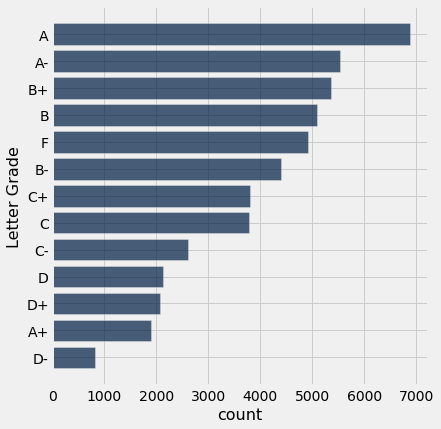

In [7]:
Table().with_column('Letter Grade', df['Letter Grade']).group(0).sort('count', descending=True).barh('Letter Grade')

In [8]:
y = df.pop('Letter Grade')
le = LabelEncoder()
le.fit(y)
y = pd.DataFrame(y)

In [9]:
columns = df.columns
columns

Index(['Theoritical', 'Practical', 'Course Credit', 'ECTS', 'Course Year_1',
       'Course Year_2', 'Course Year_3', 'Course Year_4', 'Course Year_5',
       'Course Year_6', 'Department Code_BGM/NT', 'Department Code_BGM/T',
       'Department Code_CS', 'Department Code_CTV', 'Department Code_CULT/T',
       'Department Code_DSE/T', 'Department Code_ECE/NT',
       'Department Code_ECE/T', 'Department Code_EE', 'Department Code_HIST',
       'Department Code_HIST PhD', 'Department Code_HIST/T',
       'Department Code_HUK', 'Department Code_IE', 'Department Code_ISE/NT',
       'Department Code_ISE/T', 'Department Code_ISS', 'Department Code_ITM',
       'Department Code_KHUK/NT', 'Department Code_KHUK/T',
       'Department Code_LIT', 'Department Code_MBA/NT', 'Department Code_MGT',
       'Department Code_MTS/T', 'Department Code_PHIL', 'Department Code_POLS',
       'Department Code_POLS/NT', 'Department Code_POLS/T',
       'Department Code_PSY', 'Department Code_SOC', 'Departmen

In [10]:
X = df
X.head()

,Theoritical,Practical,Course Credit,ECTS,Course Year_1,Course Year_2,Course Year_3,Course Year_4,Course Year_5,Course Year_6,...,Department Code_SOC/T,Department Code_ÖHUK PhD,Department Code_ÖHUK/NT,Department Code_ÖHUK/T,Department Code_İHP,Course Level_Graduate,Course Level_Undergraduate,Semester_Fall,Semester_Spring,Semester_Summer
0,2,2,3,5,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,3,0,3,5,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,3,2,4,6,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,3,0,3,5,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,3,0,3,5,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [11]:
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X, columns=columns)
X

,Theoritical,Practical,Course Credit,ECTS,Course Year_1,Course Year_2,Course Year_3,Course Year_4,Course Year_5,Course Year_6,...,Department Code_SOC/T,Department Code_ÖHUK PhD,Department Code_ÖHUK/NT,Department Code_ÖHUK/T,Department Code_İHP,Course Level_Graduate,Course Level_Undergraduate,Semester_Fall,Semester_Spring,Semester_Summer
0,-1.947502,2.72020,-0.039186,-0.012958,-0.932273,-0.616933,3.002942,-0.212914,-0.360121,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,-0.928861,0.982025,-0.168983
1,0.228112,-0.36762,-0.039186,-0.012958,-0.932273,1.620922,-0.333007,-0.212914,-0.360121,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,1.076587,-1.018304,-0.168983
2,0.228112,2.72020,2.719320,1.437029,1.072647,-0.616933,-0.333007,-0.212914,-0.360121,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,-0.928861,0.982025,-0.168983
3,0.228112,-0.36762,-0.039186,-0.012958,1.072647,-0.616933,-0.333007,-0.212914,-0.360121,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,-0.928861,0.982025,-0.168983
4,0.228112,-0.36762,-0.039186,-0.012958,-0.932273,1.620922,-0.333007,-0.212914,-0.360121,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,-0.928861,0.982025,-0.168983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49342,0.228112,-0.36762,-0.039186,-0.012958,-0.932273,-0.616933,-0.333007,4.696738,-0.360121,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,-0.928861,0.982025,-0.168983
49343,0.228112,-0.36762,-0.039186,-0.012958,-0.932273,1.620922,-0.333007,-0.212914,-0.360121,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,-0.928861,0.982025,-0.168983
49344,0.228112,-0.36762,-0.039186,-0.012958,-0.932273,-0.616933,3.002942,-0.212914,-0.360121,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,-0.928861,0.982025,-0.168983
49345,0.228112,-0.36762,-0.039186,-0.012958,-0.932273,-0.616933,-0.333007,4.696738,-0.360121,-0.036596,...,-0.07834,-0.014237,-0.045062,-0.072919,-0.014237,-0.364309,0.364309,-0.928861,0.982025,-0.168983


In [20]:
def get_f1_score(X, y):
    skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    f1_scores = {}
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = le.transform(y.iloc[train_index, :]), le.transform(y.iloc[test_index, :])
        svm = SVC()
        rf = RandomForestClassifier()
        lr = LogisticRegression()
        svm.fit(X_train, y_train)
        rf.fit(X_train, y_train)
        lr.fit(X_train, y_train)
        f1_scores.setdefault('svm_test', [])
        f1_scores.setdefault('rf_test', [])
        f1_scores.setdefault('lr_test', [])
        f1_scores.setdefault('svm_train', [])
        f1_scores.setdefault('rf_train', [])
        f1_scores.setdefault('lr_train', [])
        f1_scores['svm_test'].append(f1_score(y_test, svm.predict(X_test), average='micro'))
        f1_scores['rf_test'].append(f1_score(y_test, rf.predict(X_test), average='micro'))
        f1_scores['lr_test'].append(f1_score(y_test, lr.predict(X_test), average='micro'))
        f1_scores['svm_train'].append(f1_score(y_train, svm.predict(X_train), average='micro'))
        f1_scores['rf_train'].append(f1_score(y_train, rf.predict(X_train), average='micro'))
        f1_scores['lr_train'].append(f1_score(y_train, lr.predict(X_train), average='micro'))
    return f1_scores

In [21]:
f1_scores = get_f1_score(X, y)
f1_scores

{'svm_test': [0.1619047619047619,
  0.16595744680851063,
  0.16393110435663627,
  0.1590678824721378,
  0.1641337386018237,
  0.16474164133738603,
  0.16757852077001012,
  0.17207134171057964,
  0.16801783542764492,
  0.1613295500608026],
 'rf_test': [0.1574468085106383,
  0.16879432624113475,
  0.16332320162107397,
  0.1580547112462006,
  0.160081053698075,
  0.16494427558257346,
  0.1641337386018237,
  0.16700445885691123,
  0.15889744629104174,
  0.15950547223348197],
 'lr_test': [0.16129685916919959,
  0.1596757852077001,
  0.15845997973657547,
  0.16231003039513678,
  0.15339412360688956,
  0.16149949341438702,
  0.1635258358662614,
  0.16538305634373734,
  0.16376165383056343,
  0.16376165383056343],
 'svm_train': [0.17605602089525355,
  0.1752454291632892,
  0.17508781410429614,
  0.17583085652526345,
  0.1759884715842565,
  0.17513284697829415,
  0.17531297847428623,
  0.1753315470695517,
  0.17564677008983856,
  0.17569180194987954],
 'rf_train': [0.18236062325497612,
  0.1812

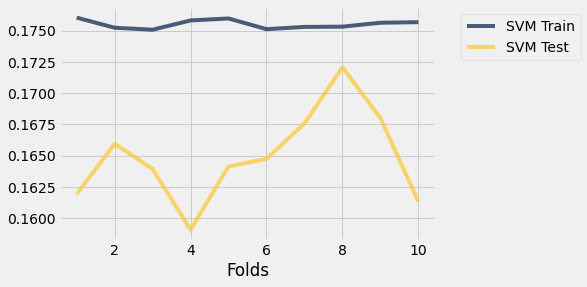

In [22]:
Table().with_columns('Folds', np.arange(1, 11), 'SVM Train', np.array(f1_scores['svm_train']), 'SVM Test', np.array(f1_scores['svm_test'])).plot('Folds')

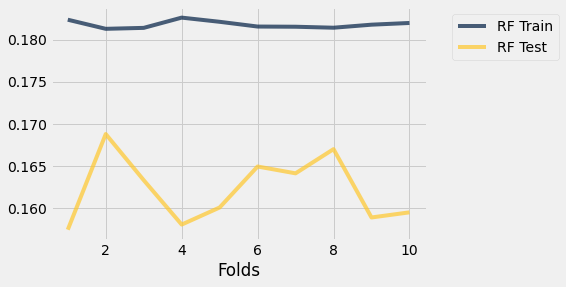

In [23]:
Table().with_columns('Folds', np.arange(1, 11), 'RF Train', np.array(f1_scores['rf_train']), 'RF Test', np.array(f1_scores['rf_test'])).plot('Folds')

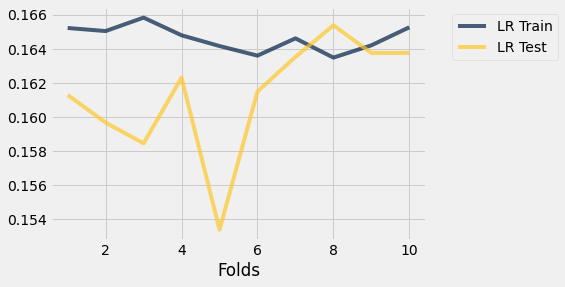

In [30]:
Table().with_columns('Folds', np.arange(1, 11), 'LR Train', np.array(f1_scores['lr_train']), 'LR Test', np.array(f1_scores['lr_test'])).plot('Folds')

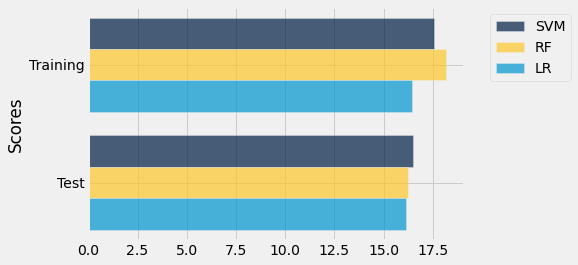

In [39]:
Table().with_columns('Scores', make_array('Training', 'Test'), 'SVM', make_array(np.average(f1_scores['svm_train'])*100, np.average(f1_scores['svm_test'])*100), 'RF', make_array(np.average(f1_scores['rf_train'])*100, np.average(f1_scores['rf_test'])*100), 'LR', make_array(np.average(f1_scores['lr_train'])*100, np.average(f1_scores['lr_test'])*100)).barh('Scores')